In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
#from mpldatacursor import datacursor
import time
import math
import cv2
from cv_bridge import CvBridge

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
#READ BAG

#When recording rosbag follow this sequence:encoder_y
# 1. rosparam set use_sim_time true
# 3. roslaunch darkentros yolov3.launch
# 4. roslaunch scooter record_data.launch
# 2. rosbag play 2019-02-11-Wentworth-P7.bag /cam_1/color/image_raw:=/cam /cam_2/color/image_raw:=/cam --clock

#'2019-03-22-Wentworth-P4-yolo'

filename='2019-09-04-Village-P5-yolo'

# bag  = rosbag.Bag('/home/maleen/' + filename + '.bag')
bag  = rosbag.Bag('/home/maleen/' + filename + '.bag')

In [2]:
#READ TOPICS

encsize=0
imusize=0
rtkllasize=0
rtkenusize=0

yolosize=0
yolosize2=0

encoder_time=np.array([])
encoder_seq=np.array([])
encoder_x=np.array([])
encoder_y=np.array([])

odom_time=np.array([])
odom_seq=np.array([])
odom_x=np.array([])
odom_y=np.array([])
odom_theta=np.array([])

odom_vx=np.array([])
odom_vy=np.array([])
odom_vtheta=np.array([])

imureal_time=np.array([])
imureal_seq=np.array([])
imureal_angvZ=np.array([])
imureal_angvX=np.array([])
imureal_angvY=np.array([])

rtklla_time=np.array([])
rtklla_seq=np.array([])
rtklla_lat=np.array([])
rtklla_long=np.array([])
rtklla_alti=np.array([])

rtkenu_time=np.array([])
rtkenu_seq=np.array([])
rtkenu_x=np.array([])
rtkenu_y=np.array([])
rtkenu_z=np.array([])

yolo_time=np.array([])
yolo_seq=np.array([])
image_time=np.array([])
image_seq=np.array([])
image_frame=np.array([])
bounding_box=[]
detectimg_time=np.array([])
detectimg=np.array([])
foundobj=np.array([])
foundobj_time=np.array([])


yolo_time2=np.array([])
yolo_seq2=np.array([])
image_time2=np.array([])
image_seq2=np.array([])
bounding_box2=[]
detectimg_time2=np.array([])
detectimg2=np.array([])
foundobj2=np.array([])
foundobj_time2=np.array([])
overall_time=np.array([])
labels=np.array([])


laser_time=np.array([])
laser_seq=np.array([])
laser_range=np.array([])

rtab_time=np.array([])
rtab_seq=np.array([])
rtab_x=np.array([])
rtab_y=np.array([])
rtab_theta=np.array([])

rtab_orientx=np.array([])
rtab_orienty=np.array([])
rtab_orientz=np.array([])
rtab_orientw=np.array([])


#topiclist=['/encoder_ticks','/darknet_ros/bounding_boxes','/darknet_ros/detection_image', '/darknet_ros/found_object']
topiclist=['/back_cam/aligned_depth_to_color/image_raw','/encoder_ticks','/odom','/casimu/imureal','/piksi/navsatfix_best_fix' ,'/darknet_ros/bounding_boxes', '/darknet_ros/found_object','/rtabmap/localization_pose'] #,'/scan'
#,'/darknet_ros/detection_image'
for topic, msg, t in bag.read_messages(topics=topiclist): #
    
        if topic=='/encoder_ticks':
            
            encoder_time=np.append(encoder_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            encoder_seq=np.append(encoder_seq,msg.header.seq)
            encoder_x=np.append(encoder_x,msg.ticks.x)
            encoder_y=np.append(encoder_y,msg.ticks.y)
            encsize=encsize+1
            overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            labels=np.append(labels,'O')
            
        elif topic=='/odom':
        
            odom_time=np.append(odom_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            odom_seq=np.append(odom_seq,msg.header.seq)
            
            odom_x=np.append(odom_x, msg.pose.pose.position.x)
            odom_y=np.append(odom_y, msg.pose.pose.position.y)
            odom_theta=np.append(odom_theta, msg.pose.pose.orientation.z)
            
            
            odom_vx=np.append(odom_vx, msg.twist.twist.linear.x)
            odom_vy=np.append(odom_vy, msg.twist.twist.linear.y)
            odom_vtheta=np.append(odom_vtheta, msg.twist.twist.angular.z)
            #overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            #labels=np.append(labels,'O')
            
            #encoder_data=np.append(encoder_data,[odom_time,odom_vx,odom_vy])
            
        elif topic=='/casimu/imureal':
        
            imureal_time=np.append(imureal_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            imureal_seq=np.append(imureal_seq,msg.header.seq)
            #print msg
            imureal_angvZ=np.append(imureal_angvZ,(msg.angular_velocity.z))
            imureal_angvX=np.append(imureal_angvX,(msg.angular_velocity.x))
            imureal_angvY=np.append(imureal_angvY,(msg.angular_velocity.y))
            imusize=imusize+1
            
        elif topic=='/piksi/navsatfix_best_fix':
        
            rtklla_time=np.append(rtklla_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtklla_seq=np.append(rtklla_seq,msg.header.seq)
            #print msg
            rtklla_lat=np.append(rtklla_lat,(msg.latitude))
            rtklla_long=np.append(rtklla_long,(msg.longitude))
            rtklla_alti=np.append(rtklla_alti,(msg.altitude))
            rtkllasize=rtkllasize+1
            
            
#         elif topic=='/piksi/enu_pose_best_fix':
        
#             rtkenu_time=np.append(rtkenu_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
#             rtkenu_seq=np.append(rtkenu_seq,msg.header.seq)
#             rtkenu_x=np.append(rtkenu_x,(msg.pose.pose.position.x))
#             rtkenu_y=np.append(rtkenu_y,(msg.pose.pose.position.y))
#             rtkenu_z=np.append(rtkenu_z,(msg.pose.pose.position.z))
#             rtkenusize=rtkenusize+1
            #print msg
        
            
        #CAMERA 01    

        elif topic=='/darknet_ros/bounding_boxes':
            
            yolo_time=np.append(yolo_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            yolo_seq=np.append(yolo_seq,msg.header.seq)

            
            image_time=np.append(image_time,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
            image_seq=np.append(image_seq,msg.image_header.seq)
            frame=msg.image_header.frame_id
            
                        
            bounding_box.append(msg.bounding_boxes)
            
            overall_time=np.append(overall_time,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
            
            if frame=='left_cam_color_optical_frame':
            
                labels=np.append(labels,'LC')
                image_frame=np.append(image_frame,'LC')
                
            elif frame=='right_cam_color_optical_frame':
            
                labels=np.append(labels,'RC')
                image_frame=np.append(image_frame,'RC')
            
#         elif topic=='/darknet_ros/detection_image':
            
#             #cv_image = bridge.imgmsg_to_cv2(msg.data, desired_encoding="passthrough")
        
#             detectimg_time=np.append(detectimg_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
#             detectimg=np.append(detectimg,msg)
#             yolosize=yolosize+1
            
        elif topic=='/darknet_ros/found_object':
           
            foundobj=np.append(foundobj,msg.data)
            
            
        elif topic=='/back_cam/aligned_depth_to_color/image_raw':
            
            
            #print('yei')
            overall_time=np.append(overall_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            labels=np.append(labels,'BC')
            
            #         elif topic=='/scan':
#             laser_time=np.append(laser_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
#             laser_seq=np.append(laser_seq,msg.header.seq)
#             laser_range=np.append(laser_range,msg.ranges)
            
        elif topic=='/rtabmap/localization_pose':
            rtab_time=np.append(rtab_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtab_seq=np.append(rtab_seq,msg.header.seq)
            rtab_x=np.append(rtab_x, msg.pose.pose.position.x)
            rtab_y=np.append(rtab_y, msg.pose.pose.position.y)

            rtab_orientx=np.append(rtab_orientx, msg.pose.pose.orientation.x)
            rtab_orienty=np.append(rtab_orienty, msg.pose.pose.orientation.y)
            rtab_orientz=np.append(rtab_orientz, msg.pose.pose.orientation.z)
            rtab_orientw=np.append(rtab_orientw, msg.pose.pose.orientation.w)
            
         #CAMERA 02
            
     
        #elif topic=='/darknet_ros_2/bounding_boxes':
            
        #    yolo_time2=np.append(yolo_time2,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
        #    yolo_seq2=np.append(yolo_seq2,msg.header.seq)
            
        #    image_time2=np.append(image_time2,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
        #    image_seq2=np.append(image_seq2,msg.image_header.seq)
            
        #    bounding_box2.append(msg.bounding_boxes)
            
        #    overall_time=np.append(overall_time,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
        #    labels=np.append(labels,'C2')
            
        #elif topic=='/darknet_ros_2/detection_image':
            
            #cv_image = bridge.imgmsg_to_cv2(msg.data, desired_encoding="passthrough")
        
        #    detectimg_time2=np.append(detectimg_time2,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
        #    detectimg2=np.append(detectimg2,msg)
         #   yolosize2=yolosize2+1
            
        #elif topic=='/darknet_ros_2/found_object':
           
         #   foundobj2=np.append(foundobj2,msg.data)
        
        


            
   

NameError: name 'np' is not defined

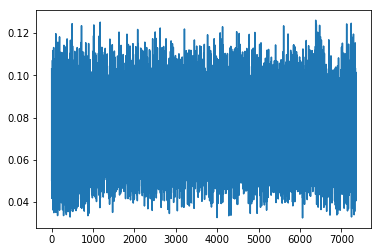

In [4]:
latency=yolo_time-image_time
plt.plot(latency)

#rtklla_time.size

In [1]:
laser_range=np.reshape(laser_range, (laser_time.size,int(laser_range.size/laser_time.size)))
laser_range.shape
rtab_time

NameError: name 'np' is not defined

In [6]:
latency


array([Decimal('0.103068918'), Decimal('0.049946778'),
       Decimal('0.070095651'), ..., Decimal('0.040645247'),
       Decimal('0.060789621'), Decimal('0.080934013')], dtype=object)

In [7]:
#BRING DATA TO ENCODER TIME

imureal_time=imureal_time-encoder_time[0]
rtklla_time=rtklla_time-encoder_time[0]
rtkenu_time=rtkenu_time-encoder_time[0]
odom_time=odom_time-encoder_time[0]
yolo_time=yolo_time-encoder_time[0]
image_time=image_time-encoder_time[0]
laser_time=laser_time-encoder_time[0]
rtab_time=rtab_time-encoder_time[0]

overall_time=overall_time-encoder_time[0]


encoder_time=encoder_time-encoder_time[0]

In [8]:
#PROCESS ENCODER DATA

encoder_wraps_x=0
encoder_wraps_y=0


encoder_x_new=np.copy(encoder_x)
encoder_y_new=np.copy(encoder_y)

for x in range(1,encoder_x.size-1):
    
    diff=encoder_x[x]-encoder_x[x-1]

 # check wrap around
    if abs(diff) > 16770000:
            # if positive wrap around, increase
        if abs(encoder_x[x]) < abs(encoder_x[x-1]):
                #print("Positive")
            encoder_wraps_x = encoder_wraps_x + 1
        # else decrease
        else:
            #print("Negative")
            encoder_wraps_x = encoder_wraps_x - 1

    encoder_x_new[x] = (16777216*encoder_wraps_x) + encoder_x[x]
           
        
for x in range(1,encoder_y.size-1):
    
    
    diff = encoder_y[x] - encoder_y[x-1]
        #print("current y : ", encoder_y[x], "previous y :", encoder_y[x-1], "diff : ", diff)

        # check wrap around
    if abs(diff) > 16770000:
            #if positive wrap around, increase
        if abs(encoder_y[x] < abs(encoder_y[x-1])):
                #print("Positive")
            encoder_wraps_y = encoder_wraps_y + 1
            # else decrease
        else:
                #print("Negative")
            encoder_wraps_y = encoder_wraps_y - 1

    encoder_y_new[x] = (16777216*encoder_wraps_y) + encoder_y[x]
        #print("tmpY : ", tmpY)

encoder_mean=(-encoder_x_new+encoder_y_new)/2
#encoder_x=encoder_x

encoderdata={'encoder_seq':encoder_seq, 'encoder_time':encoder_time, 'encoder_x_new':-encoder_x_new, 'encoder_y_new':encoder_y_new, 'encoder_mean':encoder_mean}
encoder_df = pd.DataFrame(encoderdata, columns=['encoder_seq','encoder_time','encoder_x_new','encoder_y_new','encoder_mean'])
#print encoder_df



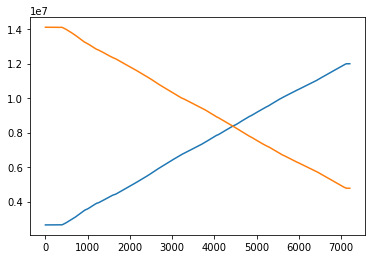

In [9]:
plt.plot(encoder_y)
plt.plot(encoder_x)
# plt.plot(encoder_mean)

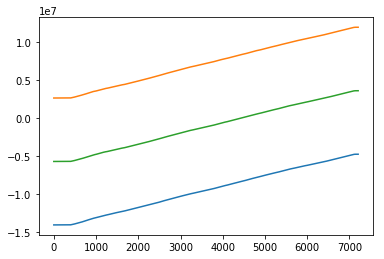

In [10]:
plt.plot(-encoder_x_new)
plt.plot(encoder_y_new)
plt.plot(encoder_mean)



In [11]:
odomdata_enc={'odom_seq':odom_seq, 'odom_time':odom_time, 'odom_x':odom_x, 'odom_y':odom_y, 'odom_theta':odom_theta, 'odom_vx':odom_vx,'odom_vy':odom_vy,'odom_vtheta':odom_vtheta}
odom_df_enc= pd.DataFrame(odomdata_enc, columns=['odom_seq','odom_time','odom_x','odom_y','odom_theta','odom_vx','odom_vy','odom_vtheta'])

In [12]:
#PROCESS YOLO DATA

#FILTER OUT DETECTED IMAGES

# bridge = CvBridge()
# detected_images=[]
# #detected_images2=[]

# x1=0


# for num in foundobj:
    
#     if num>0:
        
#         cv_image = bridge.imgmsg_to_cv2(detectimg[x1-1], desired_encoding="passthrough")
#         detected_images.append(cv_image)
    
#     x1=x1+1


yolodata={'yolo_seq':yolo_seq, 'yolo_time':yolo_time,'image_seq':image_seq, 'image_time':image_time,'image_frame':image_frame,'bounding_box':bounding_box}
yolo_df = pd.DataFrame(yolodata, columns=['yolo_seq','yolo_time','image_seq','image_time','image_frame','bounding_box'])





#print yolo_df

In [13]:
#TEST DETECTED IMAGES

plt.imshow(cv2.cvtColor(detected_images[20], cv2.COLOR_BGR2RGB))
#plt.imshow(detected_images[25])
plt.show()

NameError: name 'detected_images' is not defined

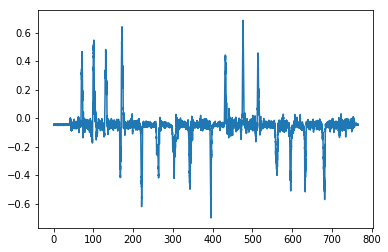

In [14]:
#PROCESS IMU DATA

# imureal_angvZ=imureal_angvZ-imureal_angvZ[0]
# imureal_angvX=imureal_angvX-imureal_angvX[0]
# imureal_angvY=imureal_angvY-imureal_angvY[0]

plt.figure(1)
plt.plot(imureal_time,-imureal_angvZ)
# thetaZ=integrate.cumtrapz(-imureal_angvZ,np.float64(imureal_time),initial=0)
# thetaX=integrate.cumtrapz(imureal_angvX,np.float64(imureal_time),initial=0)
# thetaY=integrate.cumtrapz(imureal_angvY,np.float64(imureal_time),initial=0)

# plt.figure(2)
# plt.plot(imureal_time,thetaZ)
#plt.plot(imureal_time,thetaX)
#plt.plot(imureal_time,thetaY)

imudata={'imureal_time':imureal_time, 'imureal_angvZ':imureal_angvZ}#, 'thetaZ':thetaZ}
imu_df = pd.DataFrame(imudata,columns=['imureal_time','imureal_angvZ'])#,'thetaZ'])

In [15]:
#OBTAIN ENCODER DISTANCES

dist=0

encXcalib=6.608284615932709e-05;
encYcalib=6.603486193757895e-05;
mean_calib=np.mean([encXcalib,encYcalib])

enc_dist=np.array([])
enc_times=np.array([])

mean_enctime=np.array([])


for enciter in range(1,encoder_mean.size):

    
    dist=(encoder_mean[enciter]-encoder_mean[enciter-1])*mean_calib
    
    enc_dist=np.append(enc_dist,dist)
    
    enc_times=np.append(enc_times, encoder_time[enciter])
    
    mean_enctime=np.append(mean_enctime,(encoder_time[enciter]+encoder_time[enciter-1])/2)
    


In [16]:
#INTERPOLATE THETA Z

thetaZ_interp=interp1d(np.float64(imureal_time), thetaZ, kind='linear')

#print thetaZ_interp(np.float64(mean_enctime))

#print enc_dist

NameError: name 'thetaZ' is not defined

In [17]:
#mean_theta=mean_theta-mean_theta[0]
#plt.rcParams['figure.figsize'] = [50,50]

thetaZ_samp=thetaZ_interp(np.float64(mean_enctime))
THETA_pos=thetaZ_interp(np.float64(enc_times))

dx=np.multiply(enc_dist,np.cos(THETA_pos))
dy=np.multiply(enc_dist,np.sin(THETA_pos))
Xd=0
Yd=0

X_pos=np.array([])
Y_pos=np.array([])


for num in range(0,encoder_mean.size-1):
    
    Xd=Xd+dx[num]
    Yd=Yd+dy[num]
    
    X_pos=np.append(X_pos,Xd)
    Y_pos=np.append(Y_pos,Yd)

    
plt.plot(X_pos,Y_pos)
plt.axis('equal')
plt.title('Path')
datacursor()
plt.show()


odomdata={'mean_enctime':mean_enctime,'enc_dist':enc_dist,'thetaZ_samp':thetaZ_samp,'enc_times':enc_times, 'X_pos':X_pos, 'Y_pos':Y_pos,'THETA_pos':THETA_pos}
odom_df = pd.DataFrame(odomdata,columns=['mean_enctime','enc_dist','thetaZ_samp','enc_times', 'X_pos','Y_pos','THETA_pos'])

NameError: name 'thetaZ_interp' is not defined

In [18]:
#INTERPOLATE THETA RTK_ENU

rtkenu_x_interp=interp1d(np.float64(rtkenu_time), rtkenu_x, kind='linear')
rtkenu_y_interp=interp1d(np.float64(rtkenu_time), rtkenu_y, kind='linear')
rtkenu_z_interp=interp1d(np.float64(rtkenu_time), rtkenu_z, kind='linear')

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [19]:
rtkenu_x_samp=rtkenu_x_interp(np.float64(rtkenu_time))
rtkenu_y_samp=rtkenu_y_interp(np.float64(rtkenu_time))
rtkenu_z_samp=rtkenu_z_interp(np.float64(rtkenu_time))


plt.plot(rtkenu_x_samp,rtkenu_y_samp)
plt.axis('equal')
plt.title('Path')
#datacursor()
plt.show()



NameError: name 'rtkenu_x_interp' is not defined

In [20]:
RTKdata={'rtk_time':rtklla_time,'rtklla_lat':rtklla_lat,'rtklla_long':rtklla_long,'rtklla_alti':rtklla_alti}
RTK_df = pd.DataFrame(RTKdata,columns=['rtk_time','rtklla_lat','rtklla_long','rtklla_alti'])

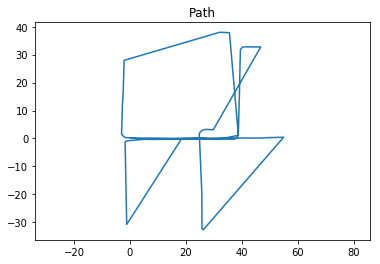

In [21]:
#RTAB PLOT

plt.plot(rtab_x,rtab_y)
plt.axis('equal')
plt.title('Path')
#datacursor()
plt.show()

In [22]:
#EXTRACT YOLO DATA

lamp_dimensions=np.array([])
lamp_times=np.array([])
yolo_index=np.array([])
yolo_labels=np.array([])
camera=np.array([])

#lamp_dimensions2=np.array([])
#lamp_times2=np.array([])
#yolo_index2=np.array([])


for row_index,row in yolo_df.iterrows():
    
        for obj in row[5]:
             if obj.Class=='post'  or  obj.Class=='parking meter' or  obj.Class=='street sign'or  obj.Class=='streetlamp' or  obj.Class=='tree':
                #print(obj.Class)
                if row[3]>mean_enctime[0] and row[3]<mean_enctime[-1]:
                    lamp_dimensions=np.append(lamp_dimensions,[obj.xmin,obj.ymin,obj.xmax,obj.ymax])
                    lamp_times=np.append(lamp_times,row[3])
                    yolo_index=np.append(yolo_index, row[0]) 
                    yolo_labels=np.append(yolo_labels, obj.Class) 
                    camera=np.append(camera,row[4])
                    
lamp_dimensions=np.reshape(lamp_dimensions, (int(lamp_dimensions.size/4), 4))  
#lamp_dimensions.shape=(lamp_dimensions.size/4, 4)
                    
#for row_index,row in yolo_df2.iterrows():
    
#        for obj in row[4]:
#             if obj.Class=='streetlamp':
#                if row[3]>mean_enctime[0] and row[3]<mean_enctime[-1]:
#                    lamp_dimensions2=np.append(lamp_dimensions2,[obj.xmin,obj.ymin,obj.xmax,obj.ymax])
#                    lamp_times2=np.append(lamp_times2,row[3])
#                    yolo_index2=np.append(yolo_index2, row[0]) 
                    
#lamp_dimensions2=np.reshape(lamp_dimensions2, (lamp_dimensions2.size/4, 4))  
                    

In [23]:
def getyolobearing(dimensions):
    
    h_fov=np.deg2rad(69.4)
    h_width=640
    centerX=h_width/2
    
    rad_per_pix=h_fov/h_width

    centroids=np.zeros((dimensions.shape[0],2))
    bearings=np.zeros(dimensions.shape[0])
    gradients=np.zeros(dimensions.shape[0])
    intercepts=np.zeros(dimensions.shape[0])
    
  
    centroids[:,0]=(dimensions[:,0]+dimensions[:,2])/2
    centroids[:,1]=(dimensions[:,1]+dimensions[:,3])/2
    
    bearings=(centroids[:,0]-centerX)*rad_per_pix
    gradients=np.tan(bearings)
    
    return bearings,centroids

In [24]:
bearings,centroids=getyolobearing(lamp_dimensions) 
#bearings2,centroids2=getyolobearing(lamp_dimensions2)


lampdata={'yolo_index':yolo_index,'lamp_times':lamp_times,'camera':camera,'bearings':bearings,'centroid_x':centroids[:,0],'centroid_y':centroids[:,1],'yolo_labels':yolo_labels}
lampdata_df= pd.DataFrame(lampdata,columns=['yolo_index','lamp_times','camera','bearings','centroid_x','centroid_y','yolo_labels'])

#lampdata2={'yolo_index2':yolo_index2,'lam p_times2':lamp_times2,'bearings2':bearings2,'centroid_x2':centroids2[:,0],'centroid_y2':centroids2[:,1]}
#lampdata_df2 = pd.DataFrame(lampdata2,columns=['yolo_index2','lamp_times2','bearings2','centroid_x2','centroid_y2'])

In [25]:
lampdata_df

yolo_index     lamp_times camera  bearings  centroid_x  centroid_y  \
0            0.0    0.656056811     RC -0.052993       292.0       109.0   
1            1.0    0.789715554     RC -0.052046       292.5       109.0   
2            2.0    0.789715554     RC -0.052046       292.5       109.0   
3            3.0    0.789715554     RC -0.052046       292.5       109.0   
4            4.0    0.789715554     RC -0.052046       292.5       109.0   
5            5.0    0.855916946     RC -0.052046       292.5       109.0   
6            6.0    0.922726920     RC -0.052046       292.5       109.0   
7            7.0    0.989165905     RC -0.052046       292.5       109.0   
8            8.0    1.189156584     RC -0.052993       292.0       109.5   
9            9.0    1.256252153     RC -0.052993       292.0       110.5   
10          10.0    1.322791497     RC -0.052046       292.5       110.5   
11          11.0    1.389796278     RC -0.052046       292.5       110.5   
12          12.0    1.456338581     RC -0.052046       292.5       110.0   
13          13.0    1.523013054     RC -0.052993       292.0       110.0   
14          14.0    1.591910715     RC -0.052993       292.0       110.5   
15          15.0    1.591910715     RC -0.052993       292.0       110.5   
16          16.0    1.591910715     RC -0.052993       292.0       110.5   
17          17.0    1.791334080     RC -0.052993       292.0       111.0   
18          18.0    1.791334080     RC -0.052993       292.0       111.0   
19          19.0    1.791334080     RC -0.052993       292.0       111.0   
20          20.0    1.860337472     RC -0.052046       292.5       110.5   
21          21.0    1.985728683     RC -0.053939       291.5       110.5   
22          22.0    2.052200336     RC -0.053939       291.5       111.0   
23          23.0    2.192493179     RC -0.054885       291.0       111.0   
24          24.0    2.252967719     RC -0.054885       291.0       111.0   
25          25.0    2.458309469     RC -0.054885       291.0       111.0   
26          26.0    2.458309469     RC -0.054885       291.0       111.0   
27          27.0    2.526795280     RC -0.054885       291.0       111.0   
28          28.0    2.581376815     RC -0.054885       291.0       111.0   
29          29.0    2.708159256     RC -0.054885       291.0       111.5   
...          ...            ...    ...       ...         ...         ...   
8186      7325.0  754.464664626     LC -0.191152       219.0       242.0   
8187      7326.0  754.464664626     LC -0.191152       219.0       242.0   
8188      7327.0  754.464664626     LC -0.191152       219.0       242.0   
8189      7328.0  754.534597463     LC -0.200615       214.0       243.5   
8190      7329.0  754.534597463     LC -0.200615       214.0       243.5   
8191      7330.0  754.534597463     LC -0.200615       214.0       243.5   
8192      7331.0  754.534597463     LC -0.200615       214.0       243.5   
8193      7332.0  754.597240970     LC -0.212917       207.5       241.5   
8194      7333.0  754.597240970     LC -0.212917       207.5       241.5   
8195      7334.0  754.597240970     LC -0.212917       207.5       241.5   
8196      7335.0  754.597240970     LC -0.212917       207.5       241.5   
8197      7336.0  754.659516765     LC -0.227111       200.0       244.0   
8198      7337.0  754.659516765     LC -0.227111       200.0       244.0   
8199      7338.0  754.659516765     LC -0.227111       200.0       244.0   
8200      7339.0  754.803521634     LC -0.242252       192.0       245.5   
8201      7340.0  754.803521634     LC -0.242252       192.0       245.5   
8202      7341.0  754.803521634     LC -0.242252       192.0       245.5   
8203      7342.0  754.870237602     LC -0.248876       188.5       248.5   
8204      7343.0  754.870237602     LC -0.248876       188.5       248.5   
8205      7344.0  754.870237602     LC -0.248876       188.5       248.5   
8206      7345.0  754.933533790     LC -0.258339      

In [26]:
sortingdata={'overall_time':overall_time, 'labels':labels}
sorting_df=pd.DataFrame(sortingdata, columns=['overall_time','labels'])

sorted_df=sorting_df.sort_values('overall_time')

In [ ]:
i=1
for img in detected_images:

    cv2.imwrite('/home/ravindra/HDD-4TB/Maleen/cloud_academic/ams_data/img_data/2019-09-07-Village/yolo/'+ filename + "-"+ str(i) + ".jpg",img) #[int(cv2.IMWRITE_JPEG_QUALITY), 100]) 
    
    i=i+1


In [27]:
#EXTRACT DATA FOR LOCALISATION 

sorted_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-sorted.csv')

imu_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-imu.csv')
encoder_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-encoder.csv')

#odom_df.to_csv('/home/ravindra/HDD-4TB/Maleen/went-test-localisation/'+filename + '-deadreck.csv')
RTK_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-RTK.csv')

lampdata_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-lampdata.csv')

odom_df_enc.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-odom_enc.csv')


In [28]:
#RTAB data

rtabdata={'rtab_seq':rtab_seq, 'rtab_time':rtab_time, 'rtab_x':rtab_x, 'rtab_y':rtab_y, 'rtab_orientx':rtab_orientx, 'rtab_orienty':rtab_orienty, 'rtab_orientz':rtab_orientz, 'rtab_orientw':rtab_orientw}
rtab_df = pd.DataFrame(rtabdata, columns=['rtab_seq','rtab_time','rtab_x','rtab_y','rtab_orientx','rtab_orienty','rtab_orientz','rtab_orientw'])

rtab_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-rtabdata.csv')

In [29]:
#LASER DATA

laserdata={'laser_seq':laser_seq,'laser_time':laser_time}
laser_df = pd.DataFrame(laserdata,columns=['laser_seq','laser_time'])

laser_df.to_csv('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-laser_timedata.csv')
np.savetxt('/home/ravindra/HDD-4TB/Maleen/csv_data/localisation_data/'+filename + '-laser_rangedata.csv', laser_range, delimiter=",")